<h1 style = "text-align:center; font-size: 30px">PROGRAMACIÓN CONCURRENTE Y DISTRIBUIDA</h1>
<a href ="https://github.com/PelayoVT">
<img src="https://avatars.githubusercontent.com/u/102515287?v=4" style="float:left;vertical-align:centre" width="110" height="110" title = "Pelayo Vázquez Toledo 22166209">
<a href ="https://github.com/PelayoVT/PCD">
<img src="https://media-exp1.licdn.com/dms/image/C4D0BAQEu_Aa76fcmPw/company-logo_200_200/0/1630998679429?e=2159024400&v=beta&t=2feC9GG7RWCWizTqsK5HzDWB1TL2DOQuAVwnMf6FFvk" title = "M21" alt="UE" width="110" height="110" style="float:right;vertical-align:centre">


# Memoria Actividad Individual 1

## Tenemos en cuenta que al trabajar con un programa base dado por el profesor en la memoria se comentarán los cambios añadidos a las funciones y las nuevas funciones.

In [3]:
from IPython import display as dp

Importamos las librerías necesarias tanto en el servidor como en el cliente

In [7]:
import socket									#libreria para comunicarse con otra consola
import threading								#libreria para hilos
import sys										#libreria para hablar con el sistema
import pickle									#pasar a binario (serializar y desserializar)
import os										#hablar con el sistema operativo

### Cliente

In [ ]:
	def __init__(self, host=input("Intoduzca la IP del servidor ?  "), port=int(input("Intoduzca el PUERTO del servidor ?  ")), nick=""): #pide el host y el puerto por el que se va a conectar
		self.s = socket.socket() #creo el shocket
		while (nick ==""):
			nick = input ("Introduce tu nombre de usuario: ")
		self.nick = nick
		with open("nicknameList.txt", "a") as f:  #creo el archivo donde se almacenan los usuarios
			f.write(self.nick + "\n")
		self.s.connect((host, int(port)))  #creamos la conexión

En la función init hemos declarada e inicializada la variable nick, al igual añadimos un bucle para que pida el nombre mientras este campo este vacío y después modificamos la lista de nombres. 

In [ ]:
	def deleteNick(self, nick):
		lines = []
		with open("nicknameList.txt", "r") as f:    #abrimos en modo lectura el txt
			nicknames = f.readlines()
			for n in nicknames:
				if (nick not in n):
					lines.append(n)
		with open ("nicknameList.txt", "w") as f:   #abrimos en modo escritura el txt para sobreescribir los datos 
			for n in lines:
				f.write(n)

Creamos una función para borrar el nick al salir del programa

In [ ]:
	def enviar(self, msg):
		self.s.send(pickle.dumps(self.nick + ": " + msg))
        
		with open ("u22166209AI1.txt", "a") as f:
			f.write(self.nick + " : " + msg + "\n")

Y en esta última parte añadimos que envie el usuario con el mensaje y que dichos mensajes se almacenen en el historial.

### Servidor

In [ ]:
		while True: #función que cierra el servidor al intruducir "1"
			msg = input('\n << SALIR = 1 >> \n')
			if msg == '1':
				print(" **** Me piro vampiro; cierro socket y mato SERVER con PID = ", os.getpid())
				with open("nicknameList.txt", "w") as f:
					f.write(" ")
				self.s.close()
				sys.exit()
			else: pass

##### En la función para cerrar el servidor añadimos que sobreescriba la lista de usuarios a " "

In [ ]:
	def readNick(self):
		with open("nicknameList.txt", "r") as f:
			print("Clientes conectados actualmente \n--------------------------" + f.read() + "--------------------------")   #leemos el archivo de los
            #nombre para mostrar los usuarios actuales

Creamos la función para que muestre los usuarios conectados en el menú del servidor

In [ ]:
	def broadcast(self, msg, cliente):
		auxiliar = 0
		for c in self.clientes:
			try:
				if c != cliente:
					if auxiliar == 0:
						print("Clientes conectados actualmente = ", len(self.clientes))
						self.readNick()
						print(pickle.loads(msg))
						auxiliar = 1
					c.send(msg)
			except: self.clientes.remove(c)

Y en el broadcast añadimos una llamada a la función comentada anteriormente (readNick)

### Guía de usuario

Aquí se demuestra el funcionamiento del programa, con la instanciación de un servidor y 6 clientes, en los que se ve los usuarios que participan y todos los requisitos del código

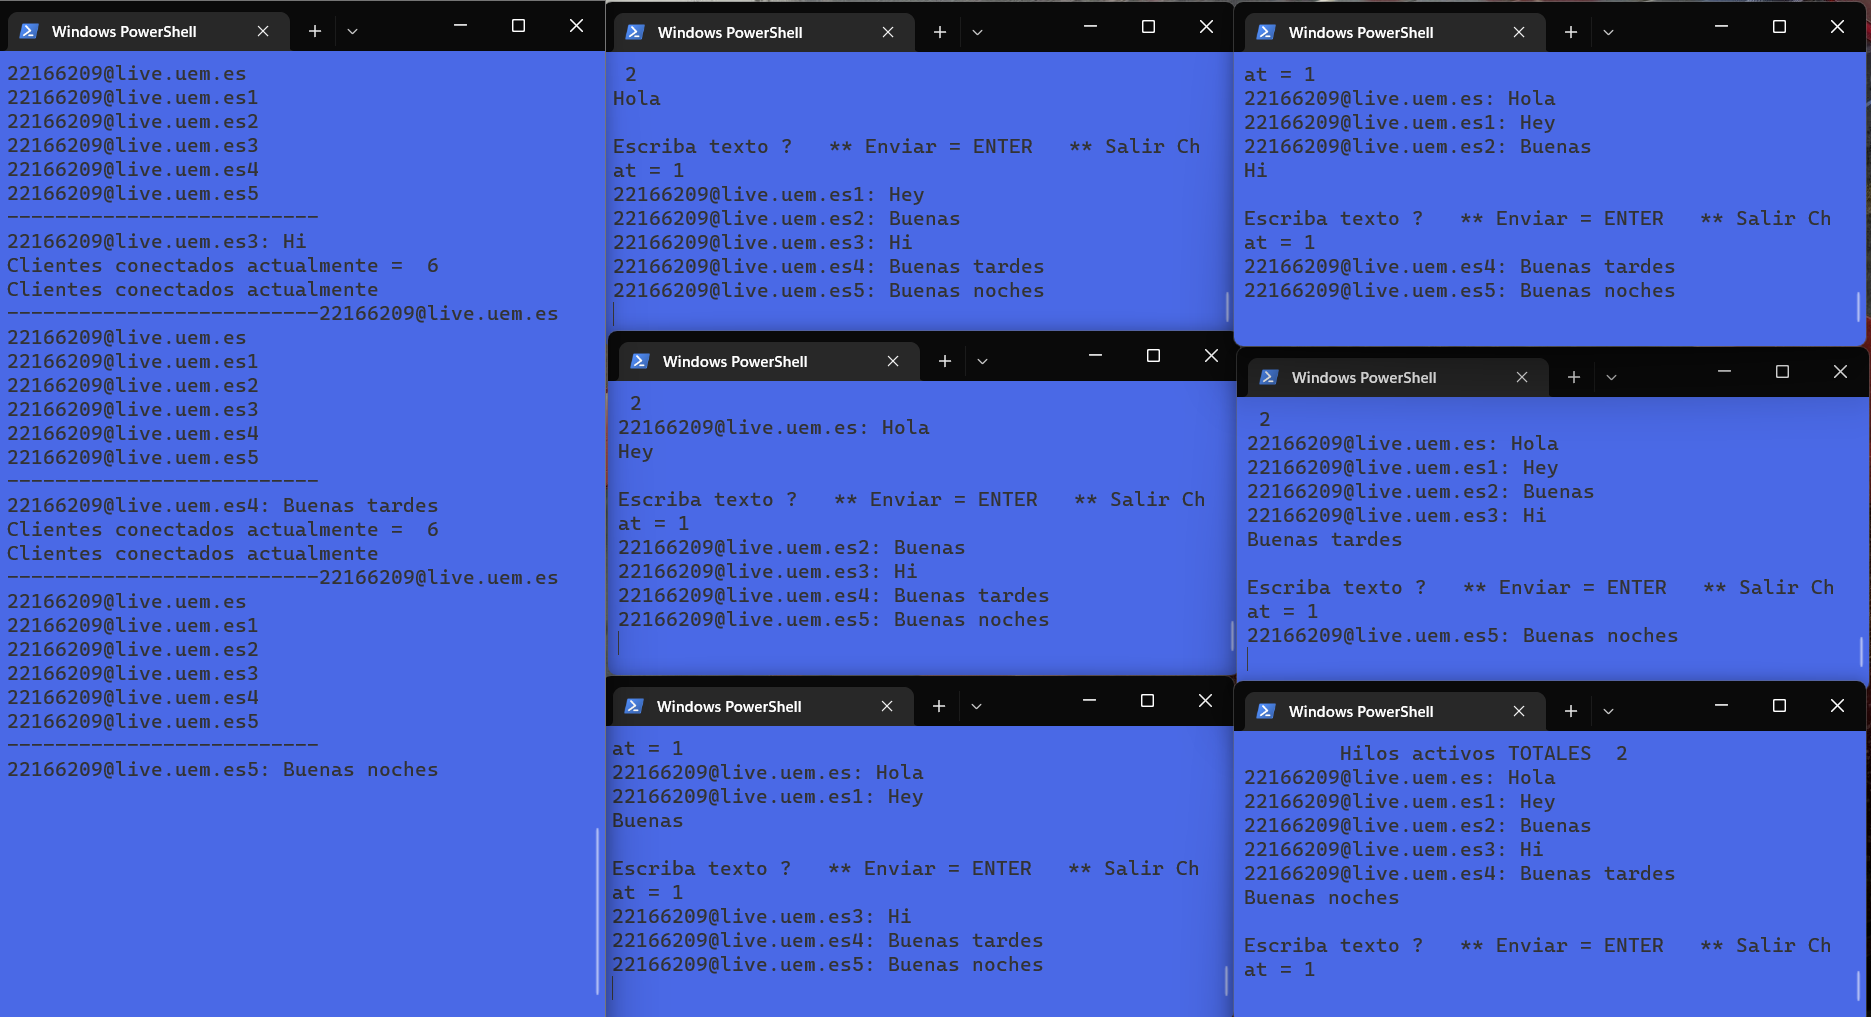

In [4]:
dp.Image("Funcionamiento del programa.png")

Utilizo el mismo color, ya que la nueva actualización de windows 11 no me deja dar un color individual a cada ventana

#### Cabe recalcal que he utilizado los primeros 5 números de mi expediente como puerto ya que los últimos 5 superaban el máximo

##### 1ª Para empezar lanzamos el servidor 
##### 2ª Le damos el puerto que vamos a usar y copiamos la IP que devuelve el powershell
##### 3ª Anotamos IP y puerto y lanzamos el cliente introducimos IP y puerto
##### 4ª Damos nuestro nick
##### 5ª Podemos mandar los mensajes y ver la información mostrada arriba 
##### 6ª Para salir del programa (servidor y cliente) escribimos un "1" por terminal